In [65]:
print ("Manuel Daza - 202016908_59")

Manuel Daza - 202016908_59


In [66]:
#Importamos las librerias 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

#Librerias para modelos K-means
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

#Librerias para evaluar el modelo
from sklearn import metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist

#]Libreria para evitar advertencia por falta de memoria
import warnings
warnings.filterwarnings('ignore')

In [67]:
#Leemos los datos para cargarlos en la variable

data = pd.read_csv('./mall_customers.csv')

In [68]:
#1. Analisis Exploratorio de los Datos:

data.head(50)

,ClienteID,Genero,Edad,Anual Salario(k$),Puntaje Compras (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [69]:
#Descripcion de los datos

data.describe()

,ClienteID,Edad,Anual Salario(k$),Puntaje Compras (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [70]:
#2. Preprocesar los datos limpiándolos:

data.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,ClienteID,Edad,Anual Salario(k$),Puntaje Compras (1-100)
count,200,200,200,200
mean,100.5,38.85,60.56,50.2
std,57.8792,13.969,26.2647,25.8235
min,1,18,15,1
25%,50.75,28.75,41.5,34.75
50%,100.5,36,61.5,50
75%,150.25,49,78,73
max,200,70,137,99


Text(0.5, 1.0, 'Identificación Datos Faltantes')

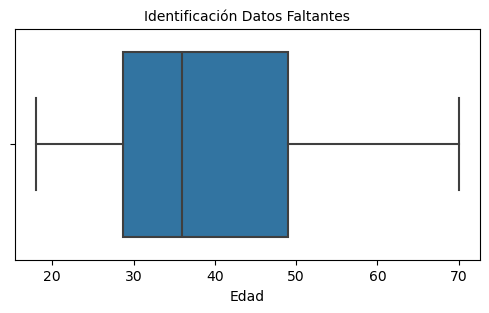

In [71]:
# Grafico para identificar valores faltantes

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Edad'])
plt.title('Identificación Datos Faltantes', fontsize=10)

In [72]:
#Revisamos Datos Faltantes

print ("Edad: ",data['Edad'].isin([0]).sum())
print ("Salario Anual: ",data['Anual Salario(k$)'].isin([0]).sum())
print ("Puntaje de Credito: ",data['Puntaje Compras (1-100)'].isin([0]).sum())

Edad:  0
Salario Anual:  0
Puntaje de Credito:  0


Text(0.5, 1.0, 'Identificación Datos Atípicos')

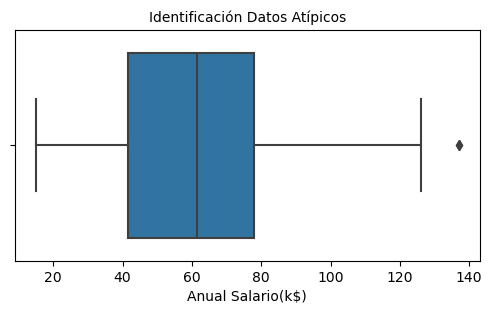

In [73]:
# Grafico para identificar valores Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=data['Anual Salario(k$)'])
plt.title('Identificación Datos Atípicos', fontsize=10)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ClienteID                200 non-null    int64 
 1   Genero                   200 non-null    object
 2   Edad                     200 non-null    int64 
 3   Anual Salario(k$)        200 non-null    int64 
 4   Puntaje Compras (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [75]:
hr_min=5
hr_max=100
total_atipicos=((data['Puntaje Compras (1-100)']<hr_min)|(data['Puntaje Compras (1-100)']>hr_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 5


In [76]:
data=data[(data['Puntaje Compras (1-100)']<hr_max)&(data['Puntaje Compras (1-100)']>hr_min)]

In [77]:
hr_min=5
hr_max=100
total_atipicos=((data['Puntaje Compras (1-100)']<hr_min)|(data['Puntaje Compras (1-100)']>hr_max)).sum()
print("El total de datos atipicos es: {}".format(total_atipicos))

El total de datos atipicos es: 0


Se revisan los valores mas importantes que son la Edad, Salario y Puntaje de Credito, pero no hay valores fuera del rango normal.

In [78]:
#3. Seleccionar las características más relevantes para entrenar:
#El objetivo es analizar el puntaje de credito de los clientes segun su edad y el salario que ganan.

data=data[['Edad','Anual Salario(k$)','Puntaje Compras (1-100)']]

In [79]:
data.head(20)

,Edad,Anual Salario(k$),Puntaje Compras (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
9,30,19,72
10,67,19,14


<function matplotlib.pyplot.show(close=None, block=None)>

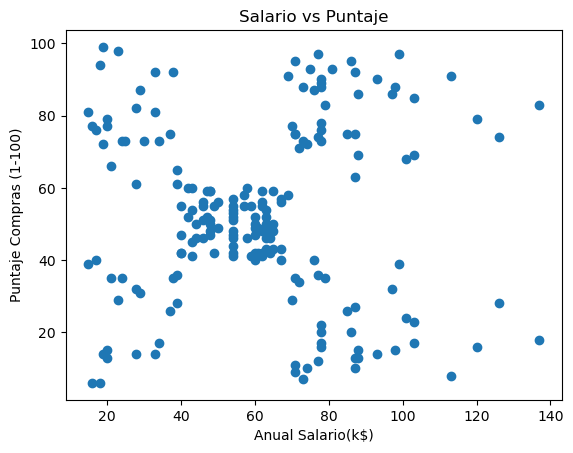

In [80]:
#Grafica del agrupamiento de datos

plt.scatter(data['Anual Salario(k$)'], data['Puntaje Compras (1-100)'])
plt.xlabel('Anual Salario(k$)')
plt.ylabel('Puntaje Compras (1-100)')
plt.title('Salario vs Puntaje')
plt.show

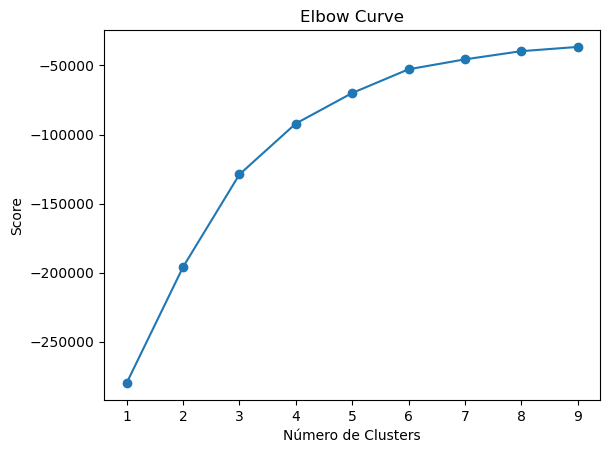

In [81]:
#4. Entrenamos el modelo con los parametros para encontrar el K-means

#Grafica de codo para identificar el valor de K
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

#La tendencia del angulo es menos marcada entre 8 y 9

In [82]:
#Generacion del modelo de agrupamiento con K = 9 

modelo = KMeans(n_clusters=9, random_state=0)
modelo.fit(data)

KMeans(n_clusters=9, random_state=0)

In [83]:
#Se añade la columna Grupo a los datos para identificar el numero de grupo del agrupamiento

modelo.labels_
data['Grupo'] = modelo.labels_
print(data)

     Edad  Anual Salario(k$)  Puntaje Compras (1-100)  Grupo
0      19                 15                       39      5
1      21                 15                       81      3
2      20                 16                        6      5
3      23                 16                       77      3
4      31                 17                       40      5
..    ...                ...                      ...    ...
195    35                120                       79      0
196    45                126                       28      7
197    32                126                       74      0
198    32                137                       18      7
199    30                137                       83      0

[191 rows x 4 columns]


In [84]:
#5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz.

#Preparacion de la metrica de la columna Grupo

observaciones = len(data)
x= data.drop('Grupo', axis=1)
clusters = data['Grupo']

In [85]:
#Se calculan las metricas
sil_score = silhouette_score (x, clusters)
calinski_score = calinski_harabasz_score(x, clusters)
davies_score = davies_bouldin_score (x, clusters)

In [86]:
# se crea una tabla para mostrar los valores de las metricas

table_datos=[
    ['Numero de Observaciones', observaciones],
    ['Coeficiente Silhouette', sil_score],
    ['Indice Calinski Harabasz', calinski_score],
    ['Indice Davis Bouldin', davies_score]
]

In [87]:
#Imprime la tabla
from tabulate import tabulate
print (tabulate(table_datos, headers=['Metric', 'Value'], tablefmt='pretty'))

+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         191         |
|  Coeficiente Silhouette  | 0.39296830461683274 |
| Indice Calinski Harabasz | 152.28835725513537  |
|   Indice Davis Bouldin   |  0.910308670415573  |
+--------------------------+---------------------+


<function matplotlib.pyplot.show(close=None, block=None)>

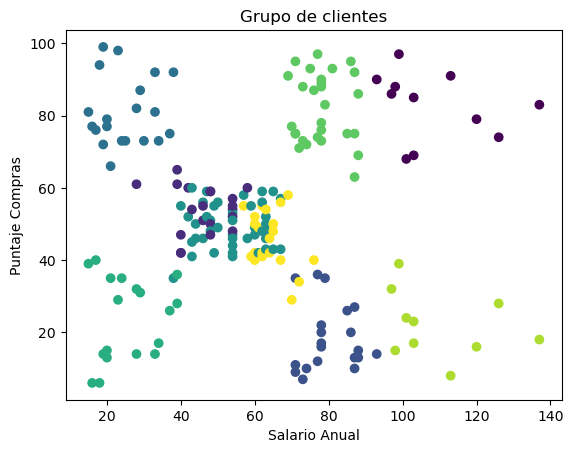

In [88]:
#6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

plt.scatter(data['Anual Salario(k$)'], data['Puntaje Compras (1-100)'], c = data['Grupo'], cmap = 'viridis')
plt.xlabel('Salario Anual')
plt.ylabel('Puntaje Compras')
plt.title('Grupo de clientes')
plt.show

In [89]:
kmeans = KMeans(n_clusters=3).fit(x)
centroids = kmeans.cluster_centers_
centroids


array([[39.80672269, 44.7394958 , 51.3697479 ],
       [32.69230769, 86.53846154, 82.12820513],
       [41.45454545, 88.51515152, 20.93939394]])

In [90]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.labels_
# Obtenemos los centroids
C = kmeans.cluster_centers_

In [95]:
# Calcular medidas de calidad para K-Means
print("Medidas de calidad para K-Means:")
print("Puntaje de silueta:", metrics.silhouette_score(x, labels))
print("Índice de Calinski-Harabasz:", metrics.calinski_harabasz_score(x, labels))
print("Inertia (suma de cuadrados dentro de los clusters):", kmeans.inertia_)
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(x, labels))

Medidas de calidad para K-Means:
Puntaje de silueta: 0.3914710821542017
Índice de Calinski-Harabasz: 110.0608144645215
Inertia (suma de cuadrados dentro de los clusters): 128911.87208869564
Davies-Bouldin Index: 0.8550421495438126


#8. Interpretar, analizar y documentar los resultados obtenidos

Segun los resultados obtenidos por el K-mean de 9 cluster y las graficas podemos concluir lo siguiente:

- El Mayor numero de personas que tienen un ingreso anual entre 40K y 70K, estan calificados son un puntaje de compras entre 4/10 y 6/10 puntos.
- Encontramos dos grupos de clientes que poseen el mayor puntaje de compras, pero no necesariamente son los que mas ganan, el primer grupo tiene un ingreso entre 10k y 40k, el segundo grupo tienen un ingreso anual entre 70k y 100k.
- El puntaje de Siluta es un poco bajo ya que su resultado es de 0.4 y lo ideal es que este mas cerca de 1.
- El indice de Davies Bouldin es de 0.85 los cual es un poco alto ya que se acerca mas a 1 y se puede entender que hay bastante separacion entre los cluster.

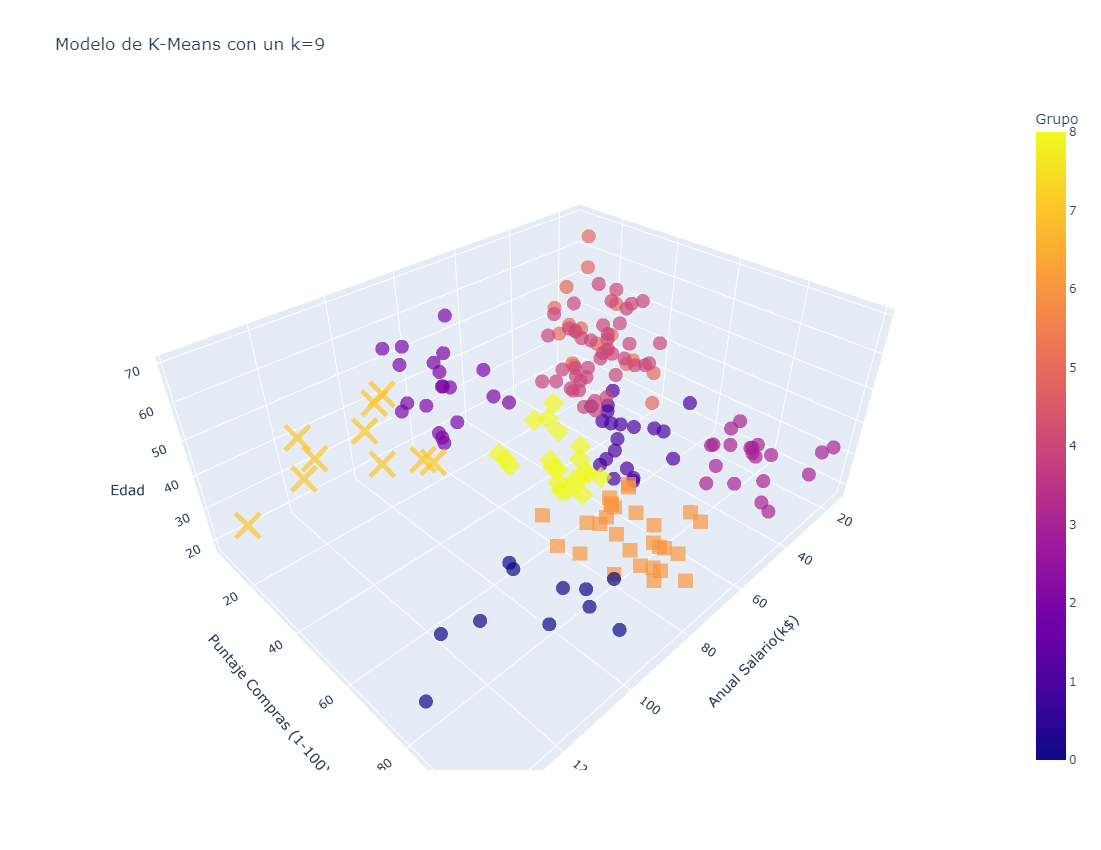

In [91]:
#Modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(data, x='Anual Salario(k$)', y='Puntaje Compras (1-100)', z='Edad', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={9}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False)